<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_UTS_RegresiUTSTelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/RegresiUTSTelkom.csv')
print(df.head())
print(df.info())

   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

##1. a) Pengumpulan dan Pembersihan Data

In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/RegresiUTSTelkom.csv')

# Ganti nama kolom numerik ke format yang bisa dibaca (opsional, tapi membantu)
df.columns = [f'feature_{i}' for i in range(len(df.columns))]

# Cek jumlah null
print("Jumlah nilai null per kolom:")
print(df.isnull().sum())

# Hapus baris yang mengandung null (jika ada)
df_cleaned = df.dropna()

# Cek duplikasi
print(f"\nJumlah data duplikat: {df_cleaned.duplicated().sum()}")

# Hapus duplikasi (jika ada)
df_cleaned = df_cleaned.drop_duplicates()

# Info akhir setelah pembersihan
print("\nData setelah pembersihan:")
print(df_cleaned.info())

Jumlah nilai null per kolom:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
             ..
feature_86    1
feature_87    1
feature_88    1
feature_89    1
feature_90    1
Length: 91, dtype: int64

Jumlah data duplikat: 164

Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 367913 entries, 0 to 368076
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   feature_0   367913 non-null  int64  
 1   feature_1   367913 non-null  float64
 2   feature_2   367913 non-null  float64
 3   feature_3   367913 non-null  float64
 4   feature_4   367913 non-null  float64
 5   feature_5   367913 non-null  float64
 6   feature_6   367913 non-null  float64
 7   feature_7   367913 non-null  float64
 8   feature_8   367913 non-null  float64
 9   feature_9   367913 non-null  float64
 10  feature_10  367913 non-null  float64
 11  feature_11  367913 non-null  float64
 12  feature_12  36791

##b) Feature Engineering

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_cleaned.drop(columns=['feature_90'])  # semua kolom kecuali kolom target
y = df_cleaned['feature_90']  # kolom target regresi

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cek bentuk hasil
print("Bentuk X_train_scaled:", X_train_scaled.shape)
print("Bentuk y_train:", y_train.shape)

Bentuk X_train_scaled: (294330, 90)
Bentuk y_train: (294330,)


##c) Model-Model

###MLP Regresi dengan TensorFlow

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===== 1. Feature Engineering =====
# Pisahkan fitur dan target
tf_X = df_cleaned.drop(columns=['feature_90'])
tf_y = df_cleaned['feature_90']

# Split data train-test
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, tf_y, test_size=0.2, random_state=42)

# Standarisasi
tf_scaler = StandardScaler()
tf_X_train_scaled = tf_scaler.fit_transform(tf_X_train)
tf_X_test_scaled = tf_scaler.transform(tf_X_test)

# ===== 2. Bangun Model MLP Regresi =====
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(tf_X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer untuk regresi
])

# Kompilasi model
tf_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

# ===== 3. Training =====
tf_history = tf_model.fit(tf_X_train_scaled, tf_y_train,
                          epochs=20,
                          batch_size=64,
                          validation_split=0.1,
                          verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 236.1921 - mae: 10.1351 - val_loss: 113.2719 - val_mae: 7.2919
Epoch 2/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 125.9147 - mae: 7.7430 - val_loss: 102.3203 - val_mae: 6.9544
Epoch 3/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 112.1686 - mae: 7.3509 - val_loss: 94.3410 - val_mae: 6.7457
Epoch 4/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 106.0930 - mae: 7.1521 - val_loss: 94.6987 - val_mae: 6.7235
Epoch 5/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 102.4772 - mae: 7.0334 - val_loss: 91.9745 - val_mae: 6.6607
Epoch 6/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 100.9331 - mae: 6.9703 - val_loss: 91.4503 - val_mae: 6.6400
Epoch 7/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 97.2177 - mae: 6.8825 - val_loss: 89.4257 - val_mae: 6.5690
Epoch 8/20
4140/4140 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 96.8696 - mae: 6.8509 - val_loss: 94.3302 - val_mae: 6.7271
Epoch 9

###Simpan Model dan Scaler

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Simpan model
tf_model.save('/content/drive/MyDrive/Models/tf_model_regresi.h5')

# Simpan scaler
import joblib
joblib.dump(tf_scaler, '/content/drive/MyDrive/Models/tf_scaler.save')

['/content/drive/MyDrive/Models/tf_scaler.save']

In [ ]:
from tensorflow.keras.models import load_model

#Load ulang
tf_model = load_model('/content/drive/MyDrive/Models/tf_model_regresi.h5')

tf_scaler = joblib.load('/content/drive/MyDrive/Models/tf_scaler.save')

###MLP Regresi dengan PyTorch

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===== 1. Feature Engineering (ulang untuk PyTorch) =====
py_X = df_cleaned.drop(columns=['feature_90']).values
py_y = df_cleaned['feature_90'].values.reshape(-1, 1)

# Split data
py_X_train, py_X_test, py_y_train, py_y_test = train_test_split(py_X, py_y, test_size=0.2, random_state=42)

# Scaling
py_scaler = StandardScaler()
py_X_train_scaled = py_scaler.fit_transform(py_X_train)
py_X_test_scaled = py_scaler.transform(py_X_test)

# Convert to tensors
py_X_train_tensor = torch.tensor(py_X_train_scaled, dtype=torch.float32)
py_y_train_tensor = torch.tensor(py_y_train, dtype=torch.float32)
py_X_test_tensor = torch.tensor(py_X_test_scaled, dtype=torch.float32)
py_y_test_tensor = torch.tensor(py_y_test, dtype=torch.float32)

# Buat dataset dan dataloader
py_train_dataset = TensorDataset(py_X_train_tensor, py_y_train_tensor)
py_train_loader = DataLoader(py_train_dataset, batch_size=64, shuffle=True)

In [18]:
# Define MLP model
class PyMLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(PyMLPRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Output layer
        )

    def forward(self, x):
        return self.model(x)

# Inisialisasi model, loss, optimizer
py_model = PyMLPRegressor(input_dim=py_X_train_tensor.shape[1])
py_criterion = nn.MSELoss()
py_optimizer = optim.Adam(py_model.parameters(), lr=0.001)

In [19]:
# Training loop
py_epochs = 20
for epoch in range(py_epochs):
    py_model.train()
    epoch_loss = 0.0
    for py_batch_X, py_batch_y in py_train_loader:
        py_optimizer.zero_grad()
        py_outputs = py_model(py_batch_X)
        py_loss = py_criterion(py_outputs, py_batch_y)
        py_loss.backward()
        py_optimizer.step()
        epoch_loss += py_loss.item()
    print(f"Epoch {epoch+1}/{py_epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/20, Loss: 784082.1891
Epoch 2/20, Loss: 554282.9386
Epoch 3/20, Loss: 518285.6699
Epoch 4/20, Loss: 492136.2187
Epoch 5/20, Loss: 477973.6479
Epoch 6/20, Loss: 462635.3960
Epoch 7/20, Loss: 456392.1067
Epoch 8/20, Loss: 448048.1142
Epoch 9/20, Loss: 438019.8690
Epoch 10/20, Loss: 434954.9948
Epoch 11/20, Loss: 436088.8980
Epoch 12/20, Loss: 428877.6790
Epoch 13/20, Loss: 424084.8150
Epoch 14/20, Loss: 419500.5316
Epoch 15/20, Loss: 414499.2936
Epoch 16/20, Loss: 411851.3713
Epoch 17/20, Loss: 408518.5688
Epoch 18/20, Loss: 408383.7375
Epoch 19/20, Loss: 405728.5947
Epoch 20/20, Loss: 402141.7701


In [21]:
print(y.isnull().sum())
print(y.dtype)

0
int64


##2. Matriks Evaluasi Regresi

###Pisahkan Fitur dan Target

In [25]:
import pandas as pd

df = pd.read_csv('/content/RegresiUTSTelkom.csv')

# Pisahkan fitur dan target
X = df.iloc[:, 1:]  # semua kolom kecuali pertama
y = df.iloc[:, 0]   # kolom pertama adalah target

###Regresi: Model dan Evaluasi

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 417564.4688 - val_loss: 721.0325
Epoch 2/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 338.7675 - val_loss: 170.5966
Epoch 3/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 226.4763 - val_loss: 155.7043
Epoch 4/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 215.8788 - val_loss: 146.2989
Epoch 5/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - loss: 223.7033 - val_loss: 144.8966
Epoch 6/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 214.3099 - val_loss: 105.4781
Epoch 7/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 232.0659 - val_loss: 124.8290
Epoch 8/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 204.6107 - val_loss: 447.2195
Epoch 9/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 236.3114 - val_loss: 141.2925
Epoch 10/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 162.3690 - val_loss: 183.0863
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE

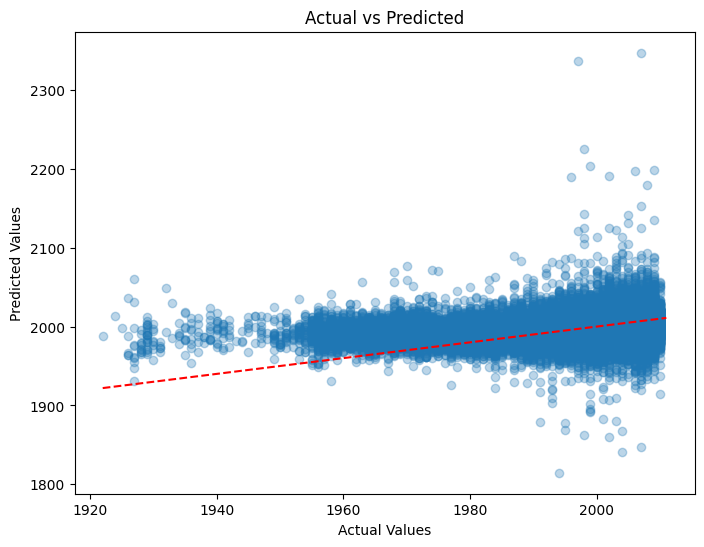

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Eval
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

###Klasifikasi (Dibuat dari Target)

In [22]:
median_value = y.median()
y_class = (y > median_value).astype(int)

In [28]:
print(X.shape)
print(y.shape)
print(y_class.shape)

(515344, 90)
(515344,)
(368078,)


X shape: (515344, 90)
y_class shape: (515344,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7071 - loss: 0.5699 - val_accuracy: 0.7306 - val_loss: 0.5378
Epoch 2/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7331 - loss: 0.5337 - val_accuracy: 0.7329 - val_loss: 0.5373
Epoch 3/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7406 - loss: 0.5243 - val_accuracy: 0.7355 - val_loss: 0.5322
Epoch 4/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7430 - loss: 0.5191 - val_accuracy: 0.7372 - val_loss: 0.5283
Epoch 5/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7456 - loss: 0.5153 - val_accuracy: 0.7385 - val_loss: 0.5283
Epoch 6/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7469 - loss: 0.5123 - val_accuracy: 0.7380 - val_loss: 0.5263
Epoch 7/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7502 - loss: 0.5070 - val_accuracy: 0.7379 - val_loss: 0.5273
Epoch 8/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 

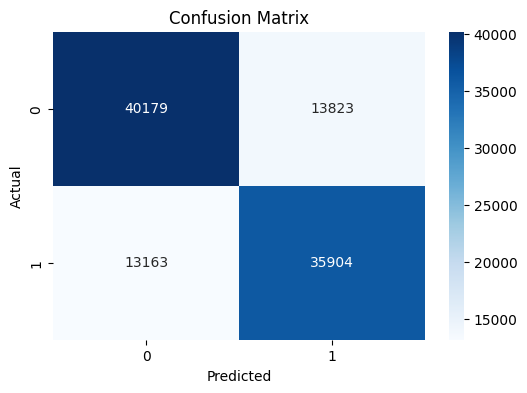

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# === STEP 1: Ambil data (pastikan ini konsisten) ===
# Misal df adalah dataframe utama yang udah kamu load:
# df = pd.read_csv('xxx.csv')

# Ambil target kolom pertama (pastikan ini diambil dari df yang sama dengan X)
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

# === STEP 2: Bikin binary class dari target yang SAMA ===
median_value = y.median()
y_class = (y > median_value).astype(int)

# --- Optional: cek bentuk biar aman ---
print(f'X shape: {X.shape}')
print(f'y_class shape: {y_class.shape}')

# === STEP 3: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# === STEP 4: Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === STEP 5: Build model ===
clf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === STEP 6: Train ===
clf_model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# === STEP 7: Predict ===
y_pred_prob = clf_model.predict(X_test_scaled).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)

# === STEP 8: Evaluation ===
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc:.4f}')

# === STEP 9: Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Penjelasan Matriks terbaik

Metrik yang paling menonjol di sini adalah AUC-ROC sebesar 0.8142, yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif secara keseluruhan, terlepas dari threshold yang digunakan. Meskipun akurasi cukup baik (73.8%), akurasi sendiri bisa menyesatkan jika dataset tidak seimbang. Precision dan recall juga seimbang (~72% dan ~73%), menunjukkan trade-off yang wajar antara false positives dan false negatives. Namun, AUC-ROC lebih unggul karena mengukur area di bawah kurva ROC yang memplot true positive rate vs false positive rate pada berbagai threshold. Artinya, meskipun kita mengubah threshold prediksi, model masih mempertahankan performa yang cukup baik secara global. Oleh karena itu, AUC-ROC menjadi metrik terbaik di sini karena memberikan gambaran menyeluruh tentang kualitas klasifikasi model.